# Capítulo1 - Interators

In [1]:
#%matplotlib
import matplotlib.pyplot as plt

In [2]:
mutants = ['charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pride']
aliases =  ['prof x', 'iceman', 'nightcrawler', 'magneto', 'shadowcat']
powers = ['telepathy', 'thermokinesis', 'teleportation', 'magnetokinesis', 'intangibility']

In [3]:
# Create a list of tuples: mutant_list
mutant_list = list(enumerate(mutants))

# Print the list of tuples
print(mutant_list)

# Unpack and print the tuple pairs
for index1, value1 in enumerate(mutants):
    print(index1, value1)

# Change the start index
for index2, value2 in enumerate(mutants, start=1):
    print(index2, value2)

[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pride')]
0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pride
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pride


## Zip

In [4]:
# Create a list of tuples: mutant_data
mutant_data = list(zip(mutants, aliases, powers))
print(mutant_data)
print()

# Create a zip object using the three lists: mutant_zip
mutant_zip = zip(mutants, aliases, powers)
print(mutant_zip)
print()

# Unpack the zip object and print the tuple values
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)


[('charles xavier', 'prof x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pride', 'shadowcat', 'intangibility')]


charles xavier prof x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pride shadowcat intangibility


## Unzip

In [5]:
# Create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# Print the tuples in z1 by unpacking with *
print(*z1)

# Re-create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# 'Unzip' the tuples in z1 by unpacking with * and zip(): result1, result2
result1, result2 = zip(*z1)

# Check if unpacked tuples are equivalent to original tuples
print(result1 == tuple(mutants))
print(result2 == tuple(powers))

('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pride', 'intangibility')
True
True


## Chunck

In [6]:
import pandas as pd

counts_dict = {}

# Iterate over the file chunk by chunk
for chunk in pd.read_csv('tweets.csv', chunksize=10):

    # Iterate over the column in DataFrame
    for entry in chunk['lang']:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

# Print the populated dictionary
print(counts_dict)

{'en': 97, 'et': 1, 'und': 2}


In [7]:
# Define count_entries()
def count_entries(csv_file,c_size,colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict

# Call count_entries(): result_counts
result_counts = count_entries('tweets.csv',10,'lang')

# Print result_counts
print(result_counts)


{'en': 97, 'et': 1, 'und': 2}


# Capítulo 2

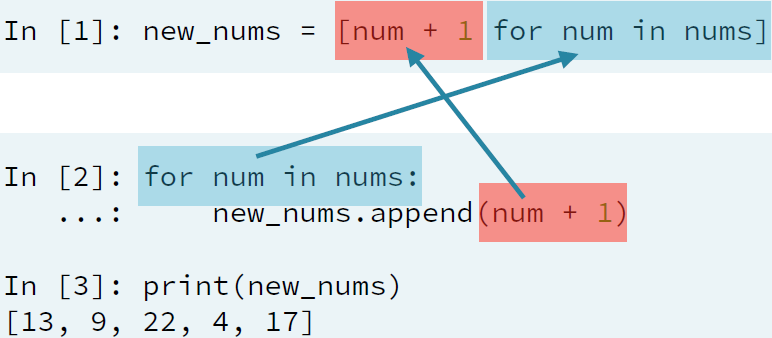

##  List comprehensions

In [8]:
squares = [i**2 for i in range(0,10)]

In [9]:
# Create a 5 x 5 matrix using a list of lists: matrix
matrix = [[col for col in range(5)] for row in range(5)]

for row in matrix:
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


## Advanced Comprehensions
#### Conditionals
[ _output expression_ **for** _iterator variable_ **in** _iterable_ **if** _predicate expression_ ]

In [10]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

In [11]:
#If, 7 caracteres ou mais
new_fellowship = [member for member in fellowship if len(member)>=7]
print(new_fellowship)

['samwise', 'aragorn', 'legolas', 'boromir']


In [12]:
# Com o else
new_fellowship = [member if len(member)>=7 else '' for member in fellowship ]
print(new_fellowship)

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


### Dict comprehensions

In [13]:
new_fellowship = {member: len(member) for member in fellowship}
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


### Generators

In [14]:
result = (num for num in range(10))

print(result)

print(next(result)), print(next(result)), print(next(result)), print(next(result)), print(next(result))

# Print the rest of the values
for value in result:
    print(value)

<generator object <genexpr> at 0x0000000009EEB518>
0
1
2
3
4
5
6
7
8
9


In [15]:
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

In [16]:
lengths = (len(person) for person in lannister)

for value in lengths:
    print(value)

6
5
5
6
7


In [17]:
# Função Generator
def get_lengths(input_list):
    """Generator function that yields the
    length of the strings in input_list."""

    # Yield the length of a string
    for person in input_list:
        yield len(person)

for value in get_lengths(lannister):
    print(value)

6
5
5
6
7


Wrapping

In [18]:
import pandas as pd
df = pd.read_csv('tweets.csv')
tweet_time = df['created_at']
tweet_time.head()

0    Tue Mar 29 23:40:17 +0000 2016
1    Tue Mar 29 23:40:17 +0000 2016
2    Tue Mar 29 23:40:17 +0000 2016
3    Tue Mar 29 23:40:17 +0000 2016
4    Tue Mar 29 23:40:17 +0000 2016
Name: created_at, dtype: object

In [19]:
tweet_clock_time = [entry[11:19] for entry in tweet_time]
print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

In [20]:
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']
print(tweet_clock_time)

['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


# Capítulo 3

In [21]:
feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_lists = [['Arab World',  'ARB',  'Adolescent fertility rate (births per 1,000 women ages 15-19)',  'SP.ADO.TFRT',  '1960',  '133.56090740552298'],
 ['Arab World',  'ARB',  'Age dependency ratio (% of working-age population)',  'SP.POP.DPND',  '1960',  '87.7976011532547'],
 ['Arab World',  'ARB',  'Age dependency ratio, old (% of working-age population)',  'SP.POP.DPND.OL',  '1960',  '6.634579191565161'],
 ['Arab World',  'ARB',  'Age dependency ratio, young (% of working-age population)',  'SP.POP.DPND.YG',  '1960',  '81.02332950839141'],
 ['Arab World',  'ARB',  'Arms exports (SIPRI trend indicator values)',  'MS.MIL.XPRT.KD',  '1960',  '3000000.0'],
 ['Arab World',  'ARB',  'Arms imports (SIPRI trend indicator values)',  'MS.MIL.MPRT.KD',  '1960',  '538000000.0'],
 ['Arab World',  'ARB',  'Birth rate, crude (per 1,000 people)',  'SP.DYN.CBRT.IN',  '1960',  '47.697888095096395'],
 ['Arab World',  'ARB',  'CO2 emissions (kt)',  'EN.ATM.CO2E.KT',  '1960',  '59563.9892169935'],
 ['Arab World',  'ARB',  'CO2 emissions (metric tons per capita)',  'EN.ATM.CO2E.PC',  '1960',  '0.6439635478877049'],
 ['Arab World',  'ARB',  'CO2 emissions from gaseous fuel consumption (% of total)',  'EN.ATM.CO2E.GF.ZS',  '1960',  '5.041291753975099'],
 ['Arab World',  'ARB',  'CO2 emissions from liquid fuel consumption (% of total)',  'EN.ATM.CO2E.LF.ZS',  '1960',  '84.8514729446567'],
 ['Arab World',  'ARB',  'CO2 emissions from liquid fuel consumption (kt)',  'EN.ATM.CO2E.LF.KT',  '1960',  '49541.707291032304'],
 ['Arab World',  'ARB',  'CO2 emissions from solid fuel consumption (% of total)',  'EN.ATM.CO2E.SF.ZS',  '1960',  '4.72698138789597'],
 ['Arab World',  'ARB',  'Death rate, crude (per 1,000 people)',  'SP.DYN.CDRT.IN',  '1960',  '19.7544519237187'],
 ['Arab World',  'ARB',  'Fertility rate, total (births per woman)',  'SP.DYN.TFRT.IN',  '1960',  '6.92402738655897'],
 ['Arab World',  'ARB',  'Fixed telephone subscriptions',  'IT.MLT.MAIN',  '1960',  '406833.0'],
 ['Arab World',  'ARB',  'Fixed telephone subscriptions (per 100 people)',  'IT.MLT.MAIN.P2',  '1960',  '0.6167005703199'],
 ['Arab World',  'ARB',  'Hospital beds (per 1,000 people)',  'SH.MED.BEDS.ZS',  '1960',  '1.9296220724398703'],
 ['Arab World',  'ARB',  'International migrant stock (% of population)',  'SM.POP.TOTL.ZS',  '1960',  '2.9906371279862403'],
 ['Arab World',  'ARB',  'International migrant stock, total',  'SM.POP.TOTL',  '1960',  '3324685.0']]

In [22]:
# Define lists2dict()
def lists2dict(list1 , list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

In [23]:
list_of_dicts = [lists2dict(feature_names, sublist ) for sublist in row_lists]
print(list_of_dicts[:1])

[{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}]


In [24]:
import pandas as pd
df = pd.DataFrame(list_of_dicts)
print(df.head())

  CountryCode CountryName   IndicatorCode  \
0         ARB  Arab World     SP.ADO.TFRT   
1         ARB  Arab World     SP.POP.DPND   
2         ARB  Arab World  SP.POP.DPND.OL   
3         ARB  Arab World  SP.POP.DPND.YG   
4         ARB  Arab World  MS.MIL.XPRT.KD   

                                       IndicatorName               Value  Year  
0  Adolescent fertility rate (births per 1,000 wo...  133.56090740552298  1960  
1  Age dependency ratio (% of working-age populat...    87.7976011532547  1960  
2  Age dependency ratio, old (% of working-age po...   6.634579191565161  1960  
3  Age dependency ratio, young (% of working-age ...   81.02332950839141  1960  
4        Arms exports (SIPRI trend indicator values)           3000000.0  1960  


Using Python generators for streaming data

Writing a generator to load data in chunks 

In [25]:
import pandas as pd
df = pd.read_csv('world_ind_pop_data.csv')


# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(0,1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)


{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

In [26]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
        
# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))


CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



In [ ]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():# Import the pandas package
            import pandas as pd

            # Initialize reader object: df_reader
            df_reader = pd.read_csv('ind_pop.csv', chunksize=10)

            # Print two chunks
            print(next(df_reader))
            print(next(df_reader))
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)

In [29]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('ind_pop.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

In [30]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(91401583.0, 44.507921139002597), (92237118.0, 45.206665319194002), (93014890.0, 45.866564696018003), (93845749.0, 46.5340927663649), (94722599.0, 47.208742980352604)]


C:\Users\dmacedo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


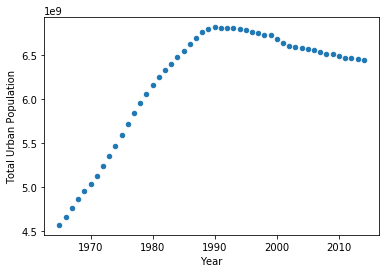

In [32]:
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb )

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

C:\Users\dmacedo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


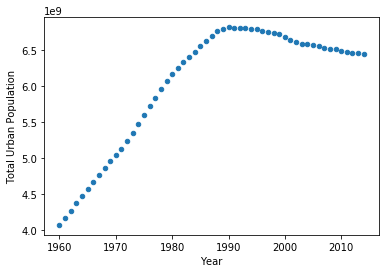

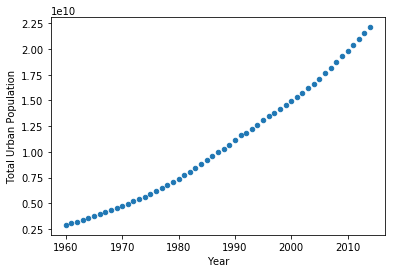

NameError: name 'play' is not defined

In [34]:
def plot_pop(filename, country_code):
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    data = pd.DataFrame()
    
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip dataframe columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new dataframe column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]
    
        # Append dataframe chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')